# Question one: local minimum is enough

Deep learning has the ability the overcome the curse of dimension, because
- most of the points with zero gradient are saddle points.
- local minimum is enough.
- number of parameters can be larger than number of data points.

Deep learning is to find surrogate models and "good" surrogate model is not unique, i.e., local minimum is enough to learn the data. In this part, I will show this property by using $NN$ to learn another $NN$ with different structure.

## 1.1. Use NN to learn another NN with different architechture

In [1]:
using Pkg
Pkg.activate("E:\\Pythonfiles\\JP\\ML\\Project.toml")
using DifferentialEquations
using LinearAlgebra, DiffEqSensitivity, Optim
using Flux: flatten, params
using DiffEqFlux, Flux
using Plots
using Flux: train!
using NNlib

  Activating environment at `E:\Pythonfiles\JP\ML\Project.toml`

2.1325996124827606e-5


1.1179578926540434e-5


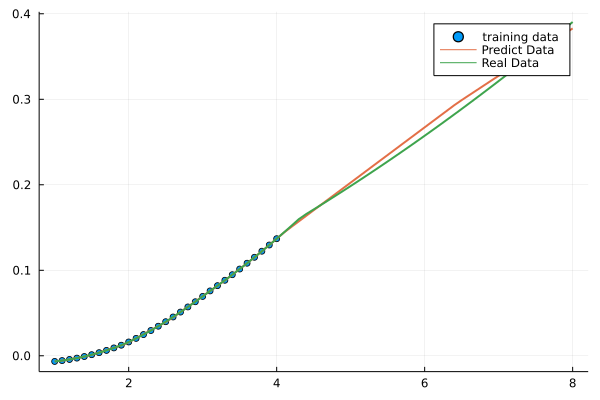

In [49]:
# Data generation
model_test = FastChain(FastDense(1,32,swish),FastDense(32,32,relu),FastDense(32,1))
p_test = Float64.(initial_params(model_test))
x = collect(1:0.1:4)'
y = collect(2:0.1:5)'
data_test = model_test(x,p_test)

model_prediction = FastChain(FastDense(1,32,relu),FastDense(32,32,relu),FastDense(32,32,relu),FastDense(32,1))
p0 = Float64.(initial_params(model_prediction))
function train(θ)
    model_prediction(x,θ)
end


# loss, keep the same

function loss(θ)
    pred = train(θ)
    sum(abs2, (data_test .- pred)), pred # + 1e-5*sum(sum.(abs, params(ann)))
end

# callback, keep  the same
const losses = []
callback(θ,l,pred) = begin
    push!(losses, l)
    if length(losses)%1000==0
        println(losses[end])
    end
    false
end

res1_node = DiffEqFlux.sciml_train(loss, p0, ADAM(0.01), cb=callback, maxiters = 2000)
res2_node = DiffEqFlux.sciml_train(loss, res1_node.minimizer, BFGS(initial_stepnorm=0.01), cb=callback, maxiters = 1000)
z = collect(1:0.1:8)
scatter(x',data_test', label="training data")
plot!(z, model_prediction(z', res2_node.u)',label = "Predict Data",lw =2)
plot!(z, model_test(z',p_test)',label = "Real Data",lw =2)


## 1.2. Using NN to leran NN with the same structure.

The same architecture but with different parameters. FIt very well but with different parameter.
$$|p_test-p_train| = 68.73007802000166$$



0.0012121851716191594
0.00044041463840577565
0.00029136407762852265
0.0002174201971169394


0.0001650192214628424
0.00013186272649823728
0.00011364490224001166


0.00010426733782719349
9.971109769605082e-5
8.264206249738801e-5
7.727357338349492e-5


7.440381934636144e-5
7.249191145667371e-5
7.098698665657097e-5
6.96905182706068e-5


6.852400119254336e-5
6.744601232276627e-5
6.642841218109646e-5
6.544539957396468e-5


6.447782326657073e-5


73.88493695075292


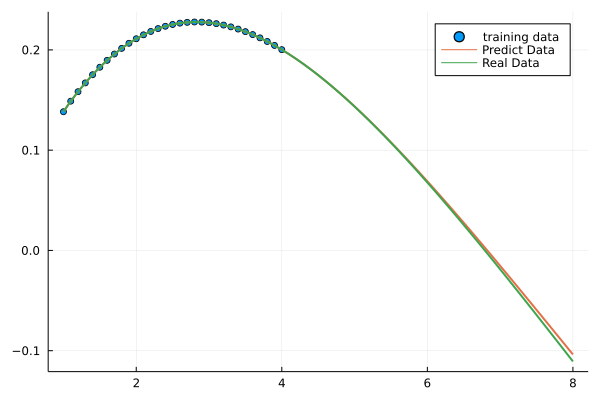

In [3]:
# Data generation
model_test = FastChain(FastDense(1,32,swish),FastDense(32,32,relu),FastDense(32,1))
p_test = Float64.(initial_params(model_test))
x = collect(1:0.1:4)'
y = collect(2:0.1:5)'
data_test = model_test(x,p_test)

model_prediction = FastChain(FastDense(1,32,swish),FastDense(32,32,relu),FastDense(32,1))
p0 = Float64.(initial_params(model_prediction))
function train(θ)
    model_prediction(x,θ)
end


# loss, keep the same

function loss(θ)
    pred = train(θ)
    sum(abs2, (data_test .- pred)), pred # + 1e-5*sum(sum.(abs, params(ann)))
end

# callback, keep  the same
const losses = []
callback(θ,l,pred) = begin
    push!(losses, l)
    if length(losses)%100==0
        println(losses[end])
    end
    false
end

res1_node = DiffEqFlux.sciml_train(loss, p0, ADAM(0.01), cb=callback, maxiters = 2000)
res2_node = DiffEqFlux.sciml_train(loss, res1_node.minimizer, BFGS(initial_stepnorm=0.01), cb=callback, maxiters = 1000)
println(sum(abs2,(res2_node.u .- p_test))) # 68.73007802000166
z = collect(1:0.1:8)
scatter(x',data_test', label="training data by NN1")
plot!(z, model_prediction(z', res2_node.u)',label = "Predict Data by",lw =2)
plot!(z, model_test(z',p_test)',label = "Real Data by NN!",lw =2)



# Summary
During test, I find many uncertainties. 

Local minimum is enough to fit the data. But not all the local minimum can do generalization well. So generalization is  weekness of Deep Learning.